In [1]:
# Exoplanet Habitability Prediction and Classification
# Author: NickoReese
# December 2022

Introduction
The existence of life outside of our planet has been a hot debate for decades. Although no extraterrestrial civilization has yet been found, the search for it and efforts are still ongoing. 
Considering roughly 100 to 400 billion stars residing only in our galaxy, among which 2 to 3 billion stars similar to our Sun, existence of life beyond our planet is not really out of the realm of possibilities and as Carl Sagan wisely put it, “Absence of evidence is not evidence of absence”.
One way to settle the question “Are we alone?” down, is to find exoplanets where the conditions are suitable enough to form life and then explore the probabilities of life having been formed or to be formed on it. A planet is called an “Exoplanet”, if it revolves around a star other than our sun. According to NASA, the number of exoplanets confirmed by 3 December 2022, is 5220. 
The measure for analyzing whether an exoplanet supports life is called “Habitability”. To determine that, numerous scientific searches have been conducted, one of which is Exoplanet Exploration by NASA. Due to the difficulty of actually exploring planets in far distances and taking samples of it to examine in laboratories, we need to go about this problem using indirect methods, such as observing transitions in the light of a star (what Kepler Space Telescope does), gravitational lensing, doppler technique and eclipses.

Taking into account this number of exoplanets, (we call them examples in this study), and also the number of various features they have (we call them attributes/features), to determine the habitability of exoplanets, we need to form a dataset and then employ DM methods to reach results we seek. 
Fortunately, there are public datasets, which have provided data needed for such projects. To name a few, we can mention “Planetary Systems (PS)” dataset, “Planetary Systems Composite Data (PSCompPars)”, both (also in the form of a service) are provided by NASA Exoplanet Science Institute at IPAC, which is under the supervision of CALTECH and National Aeronautics and Space Administration), and “PHL Exoplanet Catalog”. The latter dataset is of our interest in this project.
Being an astronomy enthusiast my whole life and a computer engineer, I decided to develop a model to predict whether an exoplanet is habitable. As more exoplanets are being discovered, the model, taking into account the features of a new exoplanet, can tell to a certain degree if that exoplanet can be a candidate for life. 
There are different parameters to consider when predicting if an exoplanet can support life. Surface temperature of a planet for example, can be of great significance as it is a reliable measure to determine if there is a possibility for existence of liquid water. It goes without saying that liquid water is vital to carbon-based life, although there might be other kinds of life as well, silicon-based for example; but that is out of scope of our study here.

In [2]:
# Importing data
import pandas as pd
import numpy as np
dataset = pd.read_csv('/kaggle/input/phl-exoplanet-catalog/phl_exoplanet_catalog_2019.csv')

After taking a closer look at the datasets mentioned, I learned that PHL Exoplanet Catalog, can fulfill the goal I have set this project. 
“PHL Exoplanet Catalog”, is extracted from The Habitable Exoplanet Catalog (HEC), which is an online database of potentially habitable world discoveries and was established on December 2011. This catalog is aimed for scientists, educators and general public. 
The reason I decided to use this dataset is that it has one attribute of my interest, which is “P_HABITABLE” and is filled with 3 nominal values: 
	- 0 for inhabitable
	- 1 for conservatively habitable 
	- 2 for optimistically habitable
Although the PSCompPars dataset of NASA is more updated and contains 5220 exoplanets, PHL catalog was a cleaner dataset with more helpful attributes for this particular research which is based on Supervised Learning.

Methodology (Supervised)

1. Preprocessing
    Dealing with missing data:
        Ignore columns with more that 40% missing data
        Fill in with mode (for categorical features)
        Impute using MICE (for numeric features)
2. Feature Selection
    Random Forest
    AdaBoost Regressor
    Extra Trees Classifier
3. Modeling
    Normalization with MinMax scalar
    Decision Tree Classification
    KNN Classification
    Gradient Boosting Classification

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


Print out the total number of missing data in each column

In [4]:
print(dataset.isnull().sum())

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64


<Axes: >

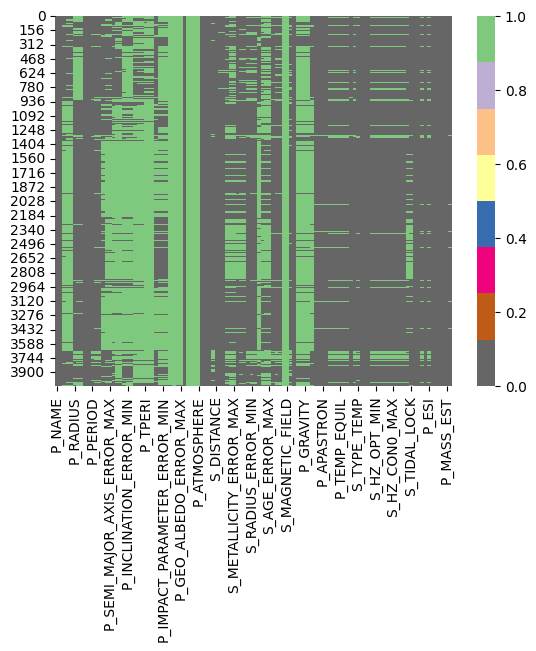

In [5]:
# Visualizing the missing data
import seaborn as sns 
sns.heatmap(dataset.isnull(), cmap='Accent_r')

Since only some of the ML algorithms can tolerate missing values, we better deal with missing values before starting the implementation of the methods and algorithms we are going to use.

In [6]:
#Calculate the total number of examples
count = dataset.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).\
sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(60)

,Count,%
P_DETECTION_MASS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
S_DISC,4048,100.000000
P_ATMOSPHERE,4048,100.000000
P_ALT_NAMES,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO_ERROR_MIN,4043,99.876482
P_TEMP_MEASURED,4043,99.876482
P_GEO_ALBEDO_ERROR_MAX,4043,99.876482


In [7]:
#Drop columns containing more than 40% missing data
dataset_cols_dropped = dataset.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',\
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES', \
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',\
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', \
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY', \
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA', \
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',\
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE', \
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN', \
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX',\
'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX', \
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'], \

axis = 1)

In [8]:
dataset_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   float64
 2   P_RADIUS                 3139 non-null   float64
 3   P_RADIUS_ERROR_MIN       3105 non-null   float64
 4   P_RADIUS_ERROR_MAX       3105 non-null   float64
 5   P_YEAR                   4048 non-null   int64  
 6   P_UPDATED                4048 non-null   object 
 7   P_PERIOD                 3938 non-null   float64
 8   P_PERIOD_ERROR_MIN       3807 non-null   float64
 9   P_PERIOD_ERROR_MAX       3807 non-null   float64
 10  P_DETECTION              4048 non-null   object 
 11  S_NAME                   4048 non-null   object 
 12  S_RA                     4048 non-null   float64
 13  S_DEC                    4048 non-null   float64
 14  S_MAG                   

In [9]:
#Print the categorical features
dataset_cols_dropped.select_dtypes(include = ['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_ALT_NAMES', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

There are some categorical features in the data set which need to be taken care of first. As I mentioned before, we go about imputing the missing data in categorical columns, using mode imputation. As the output shows, there are 13 object-typed attributes. Let’s single them out:


In [10]:
#Single the missing data out - categorical features

#Put the categorial columns in the object_cols
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

#Print the percentage of each column which belongs to the missing data
count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


No missing data except for columns P_TYPE_TEMP, S_TYPE_TEMP, and P_TYPE.
ASSUMPTION:
Although there is a reason for having these missing values in the dataset, which is lack of information, we have to assume that the data we are dealing with, is MAR (Missing At Random), so that we can use fill-in the missing data methods.

In [11]:
#Fill in the missing data in categorical columns using mode

dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP']\
.fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].\
fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna\
(dataset_cols_dropped['P_TYPE'].mode()[0])

In [12]:
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_NAME,0,0.0
P_UPDATED,0,0.0
P_DETECTION,0,0.0
S_NAME,0,0.0
S_ALT_NAMES,0,0.0
P_TYPE,0,0.0
S_TYPE_TEMP,0,0.0
S_RA_T,0,0.0
S_DEC_T,0,0.0
P_TYPE_TEMP,0,0.0


Since we’d like to use machine learning techniques and models, all the data need to be converted to numeric values. Thus, all values in categorical attributes here is encoded to numbers using the code snippet below:

In [13]:
#Convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}

#Encode each member of encoders dictionary
for col in dataset_cols_dropped.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    dataset_cols_dropped[col] = encoders[col].fit_transform(dataset_cols_dropped[col])

It is time to impute missing data in columns other than categorical ones.

Here MICE (Multivariate Imputation by Chained Equations) was used to do so. MICE makes an educated guess about true values of missing data by looking at other data samples.  

In [14]:
#Impute in the missing data with MICE 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
imputed_data = dataset_cols_dropped.copy(deep = True) 

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)

imputed_data.head(6)

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,4.798394,8.416071,-2.071662,2007,0,326.03000,-0.32,0.32,...,0,1,0,0.083813,24,24,5,12.082709,6165.86330,1.29
1,1,3.0,4.798394,8.416071,-2.071662,2009,146,516.21997,-3.20,3.20,...,0,1,0,0.082414,83,83,42,12.229641,4684.78480,1.53
2,2,3.0,4.798394,8.416071,-2.071662,2008,0,185.84000,-0.23,0.23,...,0,1,0,0.081917,0,0,2,12.848516,1525.57440,0.83
3,3,3.0,4.798394,8.416071,-2.071662,2002,146,1773.40000,-2.50,2.50,...,0,0,0,0.145241,39,39,34,12.865261,1481.07850,2.93
4,4,3.0,4.798394,8.416071,-2.071662,1996,146,798.50000,-1.00,1.00,...,1,2,0,0.368627,30,30,75,13.421749,565.73385,1.66
5,5,3.0,4.798394,8.416071,-2.071662,2008,0,993.30000,-3.20,3.20,...,0,1,0,0.216174,31,31,22,12.424038,3273.62840,2.60


In [15]:
#Print the number of missing values in Mice_temp_data 
imputed_data.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 71, dtype: int64

Distribution of classes before balancing the data set:

In [16]:
#Class distribution before sampling
from collections import Counter
counter_ = Counter(imputed_data['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(imputed_data['P_HABITABLE']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

Class=0, n=3993 (98.641%)
Class=2, n=34 (0.840%)
Class=1, n=21 (0.519%)


Now to tackle this issue, we can use:
Over-sampling: duplicate or create new synthetic examples in the minority class
Under-sampling: delete or merge examples in the majority class 

I decided to use a combination of both methods, that is, oversampling and under sampling both are applied on my dataset to have a more efficient sampling.

I used SMOTEENN from imblearn.combine. According to imbalanced-learn.org , SMOTEENN combines over- and under-sampling using SMOTE and Edited Nearest-Neighbors.

In [17]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = imputed_data.drop(['P_HABITABLE'], axis = 1), imputed_data.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)

#The distribution after applying SMOTEENN  
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n=3843 (32.925%)
Class=1, n=3993 (34.210%)
Class=2, n=3836 (32.865%)


The output shows that the classes “conservatively habitable” (represented by 1 in P_HABITABLE), and “optimistically habitable” (represented by 2 in P_HABITABLE), which were the minority classes, now are oversampled and have a much larger number of examples; on the other hand, the majority class “inhabitable” (represented by 0) also has less number of examples as before. This output illustrates that our dataset is successfully balanced.

In [18]:
#concatenate X and y into a new dataset
sampled_data = X
sampled_data['P_HABITABLE'] = y

In [19]:
sampled_data.shape

(11672, 71)

Perfect correlation between 2 attributes might result in Multicollinearity, which might be a problem when training our model. Multicollinearity occurs when an independent variable is correlated with another (or more than one other) variable to a high degree. This would weaken the significance of an independent variable. 
To prevent this, we identify such attributes. 
Let’s say a pair of attributes are in perfect correlation state. It seems reasonable to keep one and drop the other to prevent multicollinearity.   

For numeric data, we can use Pearson’s Coefficient. Fortunately, we have got the function corecoef() from NumPy, and corr() from pandas to do so for us. corecoef() calculates the Pearson’s coefficient and corr() provides us with a square matrix where each cell shows us the correlation value between each attribute pair. Let’s get to the code.

In [20]:
#Correlation Analysis
correlation_mat = sampled_data.corr().abs()
#print (correlation_mat)

<Axes: >

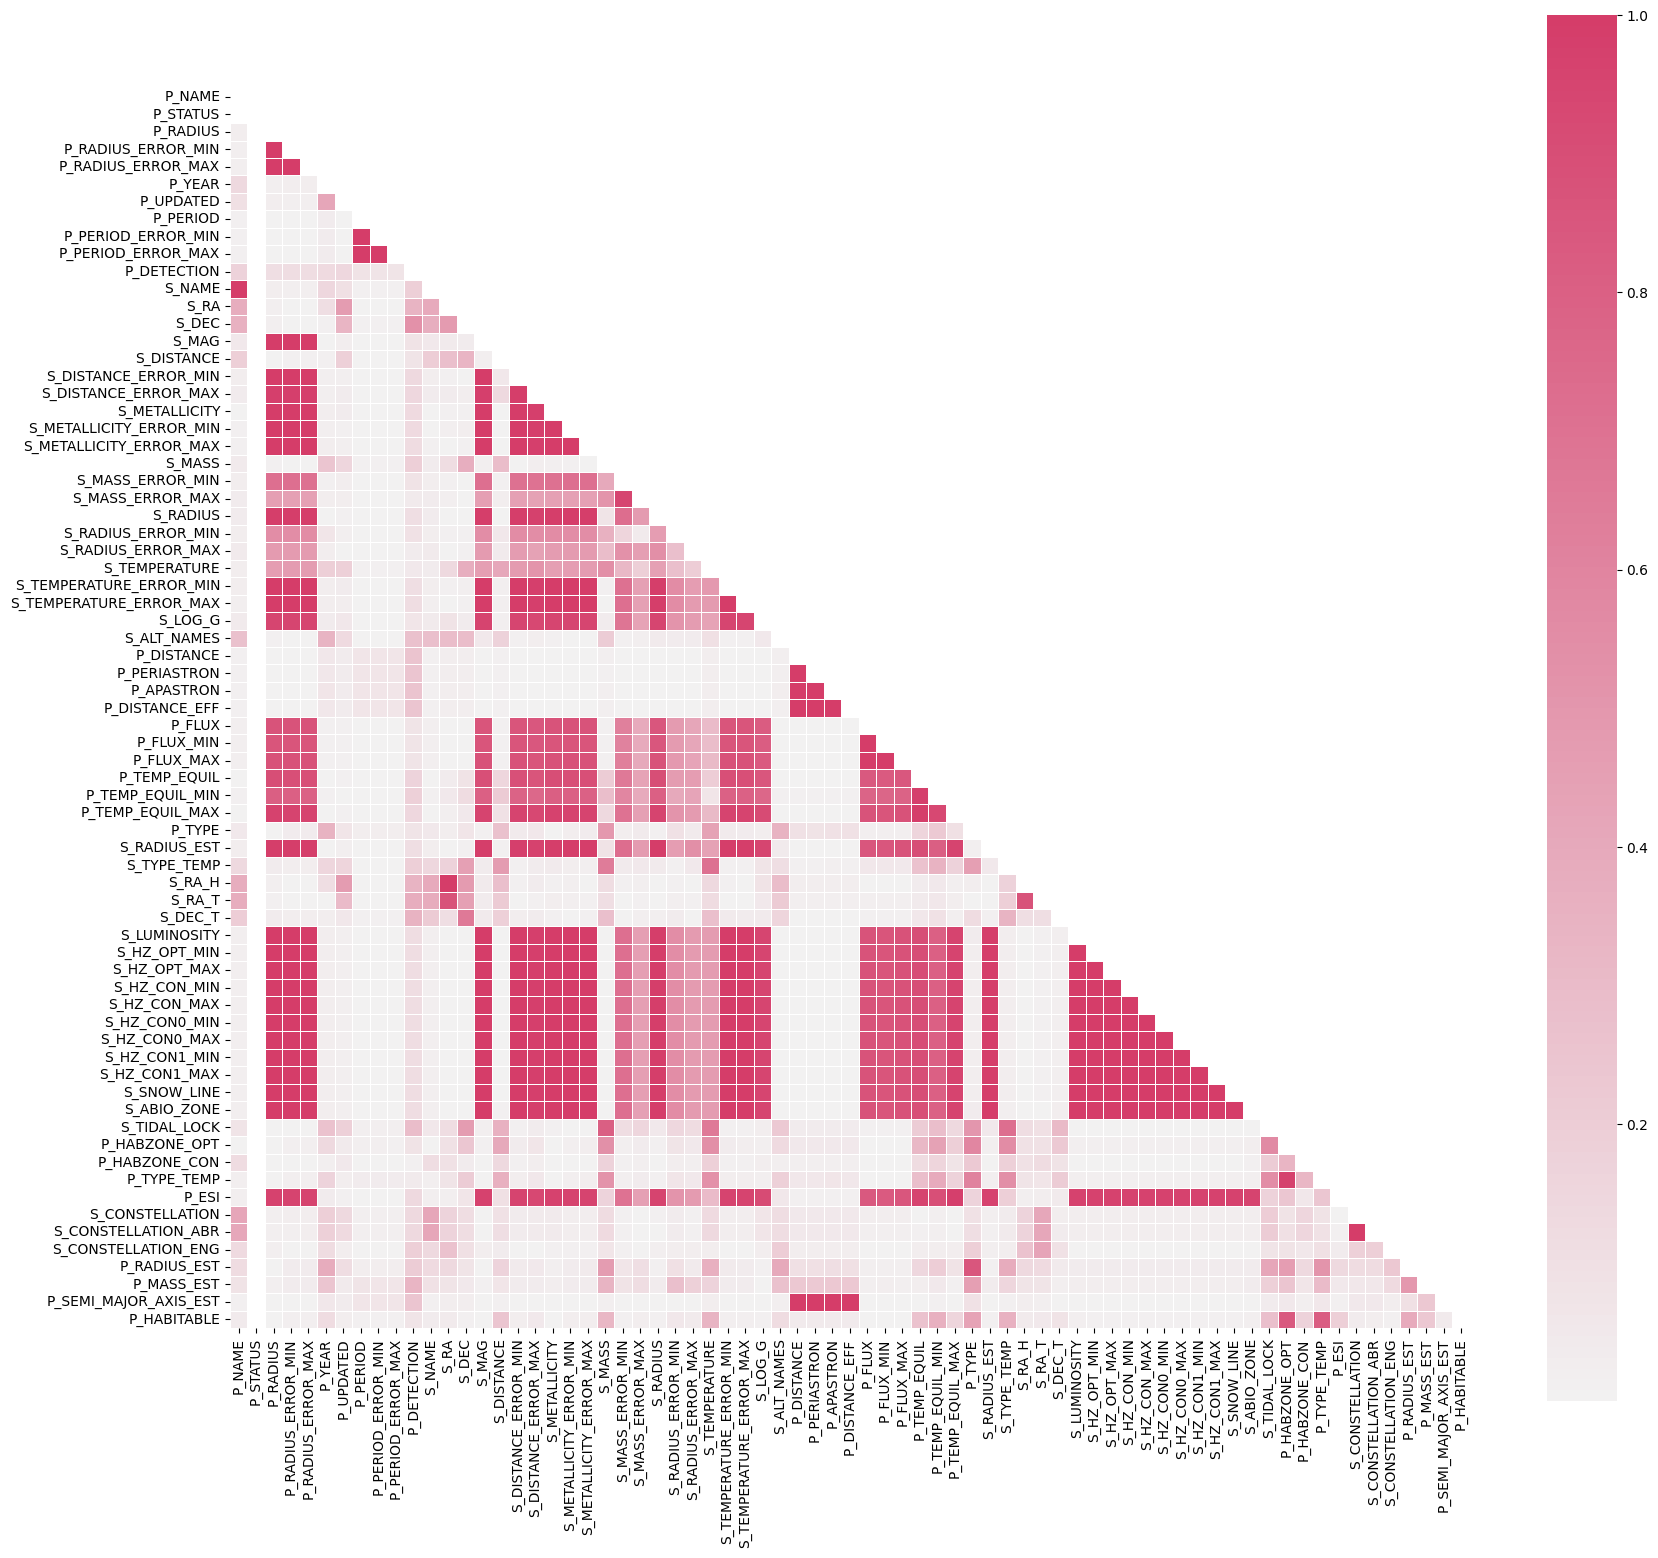

In [21]:
#Plot the correlation matrix 
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

Print out the columns which need to be dropped (Correlaation > 95%):

In [22]:
#Return the dimensions of the correlation_mat using shape()
#Return the upper triangle using np.triu
#Convert ones and zeros to boolean falses and trues using astype(np.bool_)
#Use where() to return those indices where values exist
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

#Set up an array of the columns to be dropped (correlation greater than 95%)
to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

#Print the list of the columns to be dropped
print(to_drop)

['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST']


In [23]:
#Drop the columns with correlation greater than 95%
preprocessed_data = sampled_data.drop(['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',\
'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN',\
'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',\
'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN',\
'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF',\
'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',\
'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',\
'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',\
'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis = 1)
preprocessed_data.head()

#preprocessed_data.shape

,P_NAME,P_STATUS,P_RADIUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_RA,S_DEC,S_DISTANCE,...,S_RA_T,S_DEC_T,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_HABITABLE
0,0,3.0,4.798394,2007,0,326.03000,7,185.17928,17.792868,93.37,...,687,259,0.642400,0,0,24,5,12.082709,6165.86330,0
1,1,3.0,4.798394,2009,146,516.21997,7,229.27454,71.823898,125.72,...,847,2236,0.648683,0,0,83,42,12.229641,4684.78480,0
2,2,3.0,4.798394,2008,0,185.84000,7,352.82257,39.236198,75.59,...,2982,611,0.600010,0,0,0,2,12.848516,1525.57440,0
3,3,3.0,4.798394,2002,146,1773.40000,7,242.60130,43.817646,17.94,...,890,1203,0.445415,0,0,39,34,12.865261,1481.07850,0
4,4,3.0,4.798394,1996,146,798.50000,7,295.46655,50.517525,21.15,...,2448,2114,0.473325,1,1,30,75,13.421749,565.73385,0


Our dataset is now “preprocessed_data” which does not encompass those perfectly correlated columns. In addition, the number of attributes now are reduced to 32 columns

First thing we need to do is to drop the target attribute, i.e., P_HABITABLE, from our dataset so that we can have a feature matrix based on which the habitability is going to be predicted. 

In [24]:
#Feature Selection
#Split dataset into feature matrix and target tuple
feature_mat = preprocessed_data.drop('P_HABITABLE', axis = 1)
target = preprocessed_data['P_HABITABLE']

The reason I thought one method would not be adequate enough was that I intended to check if different methods would render distinct/different features as important. 

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#Use split data: feature_mat and target
estimator = rf(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(rf(n_estimators = 1000, random_state = 0).fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False  True False
 False False False  True False False  True  True  True False False False
  True  True False False False  True  True]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST']
[0.01011954 0.         0.01341369 0.00214614 0.00096326 0.03099569
 0.00421972 0.00242623 0.00480886 0.02942088 0.0466507  0.00636254
 0.01085003 0.00581407 0.00401169 0.04932591 0.00151618 0.0274125
 0.12337267 0.11660035 0.14456932 0.01018317 0.00212827 0.00214191
 0.03321273 0.13773935 0.00039486 0.00475791 0.0009992  0.08453919
 0.08890345]


In [26]:
#Feature Selection using AdaBoost
from sklearn.ensemble import AdaBoostRegressor as Ada

#Use split data: feature_mat and target
estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [ True False False False False  True False False False False False False
 False False False False False False  True False  True False False False
 False  True False False False False  True]
['P_NAME', 'P_PERIOD', 'P_FLUX', 'P_TYPE', 'P_HABZONE_OPT', 'P_MASS_EST']
[5.25937794e-02 0.00000000e+00 1.54029246e-02 1.82560658e-03
 0.00000000e+00 3.55865035e-02 0.00000000e+00 0.00000000e+00
 4.30295987e-03 2.38061704e-02 3.21804356e-02 0.00000000e+00
 0.00000000e+00 3.29915263e-04 8.45905228e-03 2.50111524e-02
 0.00000000e+00 5.57902028e-03 1.18493914e-01 2.69433147e-02
 3.74909000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.13155624e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.23487334e-02 3.90718931e-02]


In [27]:
del features
del estimator
del selector
del status

In [28]:
#Feature Selection using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier as et

#Use split data: feature_mat and target
estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status) 

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False False False
 False False False False False False False  True  True False False False
  True  True False False False  True False]
['P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST']
[0.03021291 0.         0.01906354 0.00595271 0.00854241 0.01252369
 0.02894596 0.01186395 0.02199701 0.01926008 0.030602   0.0060956
 0.00671099 0.00791067 0.005979   0.02711028 0.00774203 0.01102735
 0.01466379 0.03473564 0.1623475  0.03101826 0.01067947 0.01223249
 0.04227165 0.31016156 0.01969855 0.01806531 0.01118071 0.04402847
 0.02737643]


In [29]:
del feature_mat
del target
del X
del y

Let’s make a conclusion selecting the ones that were resulted in more than once in the feature selection stage:
P_PERIOD, P_FLUX, P_TEMP_EQUIL, P_TYPE, P_HABZONE_OPT, P_RADIUS_EST, P_MASS_EST, S_TYPE_TEMP

In [30]:
#Modeling
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#The feature_mat has to consist of only the features 
#we have selected in Feature Selection phase
feature_mat = preprocessed_data[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL',\
'P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP']]

#The target column to test with
target = preprocessed_data['P_HABITABLE']

#Split the feature_mat and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_mat, target,\
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X_train.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y_train.shape}")
print(f"y_test dimentions: {y_test.shape}")

X_train dimentions: (7820, 8)
X_test dimentions: (3852, 8)
y_train dimentions: (7820,)
y_test dimentions: (3852,)


In [31]:
######################################
######## MODELING
######################################

In [32]:
#Normalize the training set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

FYI:
MinMaxScaler itself, follows the code below:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

There is one matter to be taken care of before modeling with Decision Tree Classifier, and that is the hyper-parameters of an estimator. 
If not tuned right, they can result in some consequences. In decision tree for example, if the depth of the tree was set to a large number, that would lead to overfitting. Thus, GridSearchCV is used here to find the best hyper-parameters for each estimator in modeling.

* GridSearchCV:
    Instead of experimenting on different parameters manually, I used GridSearchCV. As the name suggests, it conducts a grid search on all the combinations of hyper parameters.
    In the case of Decision Tree, I needed to find ‘max_depth’, ’max_leaf_nodes’, ‘random_state' and ‘splitter'.

In [33]:
#Multi-class classification  
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Find the best parameters for Decision Tree using GridSearchCV
#Hyperparameters' range
param_grid = {'max_depth': np.arange(2, 10, 1), 
              'max_leaf_nodes': np.arange(2, 100, 10),
              'random_state': [0, 1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

#Conduct the Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid = param_grid,
                           refit = True, verbose = 0)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 12, 'random_state': 0, 'splitter': 'best'}


In [34]:
#Confusion Matrix plotting function

from sklearn.metrics import confusion_matrix

def plot_confusion_mat(ytest, ypred):
    #Create  a confusion matrix, which compares the y_test and prediction made
    conf_mat = confusion_matrix(ytest, ypred)

    #Create a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    #Assign corresponding names to labels
    confusion_mat_df = pd.DataFrame(conf_mat,
                         index = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'], 
                         columns = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'])

    #Plot the confusion matrix
    plt.figure(figsize = (5,4))
    sns.heatmap(confusion_mat_df, annot = True)
    plt.title('Habitability Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    return conf_mat

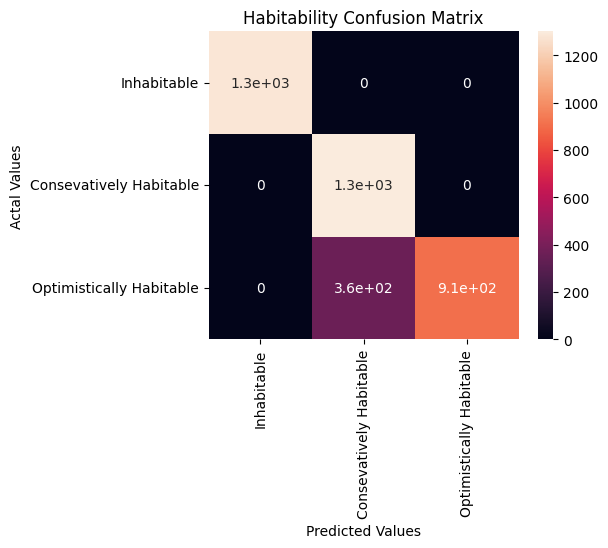

Decision Tree classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       0.78      1.00      0.88      1301
           2       1.00      0.72      0.83      1267

    accuracy                           0.91      3852
   macro avg       0.93      0.91      0.90      3852
weighted avg       0.93      0.91      0.90      3852



In [35]:
#Decision Tree - Classification

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
dtree_model = DecisionTreeClassifier(splitter = 'random', 
                                     max_depth = 6,
                                     random_state = 0, 
                                     max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
dtree_predictions = dtree_model.predict(X_test)

#Calculate the time taken for further comparison
dtree_time = time.time() - t0

#Store accuracy for final model comparison
dtree_accuracy = accuracy_score(y_test, dtree_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, dtree_predictions)

#Classification Report
print(f"Decision Tree classification Report:\n")
print(classification_report(y_test, dtree_predictions))

del confusion_mat
del t0

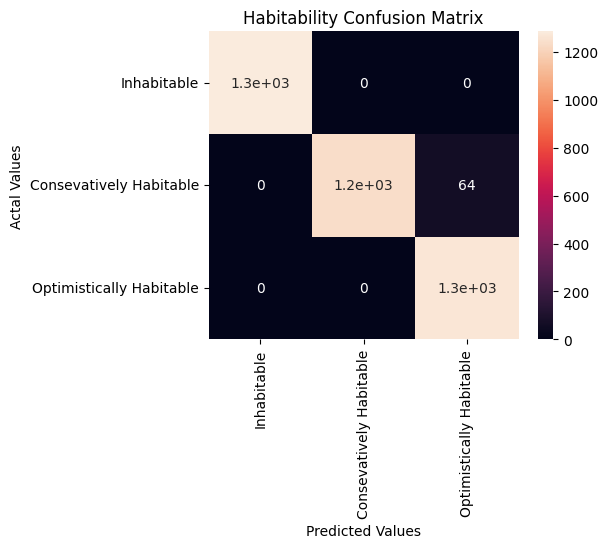

KNN classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.95      0.97      1301
           2       0.95      1.00      0.98      1267

    accuracy                           0.98      3852
   macro avg       0.98      0.98      0.98      3852
weighted avg       0.98      0.98      0.98      3852



In [36]:
#KNN classifier - Classification
from sklearn.neighbors import KNeighborsClassifier

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

#Test the model
knn_predictions = knn_model.predict(X_test)

#Calculate the time taken for further comparison
knn_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
knn_accuracy = accuracy_score(y_test, knn_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, knn_predictions)

#Classification Report
print(f"KNN classification Report:\n")
print(classification_report(y_test, knn_predictions))

del confusion_mat
del t0

The parameter n_neighbors is set to 3 (I tried different ones, the model had been returning the same accuracy up to n_neighbors = 91 when the accuracy started to drop).

* Gradient Boosting:
    As the name suggests, it is a boosting classification that attempts to build a stronger classifier using the weaker ones. The idea is to predict the class of a data point and compare it to the actual class, then pass the error, if any, as feedback to the model; then the model uses this feedback to find the gradient and lessen the error rate by changing the parameters. After that, the training is done again. 
    Gradient Boosting has some tree-specific parameters, which affect each tree in the model, namely, max_depth, max_leaf_nodes, min_samples_split, etc.
    I will use the previously calculated tree specific hyper-parameters, and will use GridSearchCV to find n_estimators and criterion.


In [37]:
#Gradient Boosting classification  
#GridSearchCV
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Find the best parameters for Gradient Boosting using GridSearchCV
#Hyperparameters' range

param_grid = {'criterion': ['friedman_mse',  'mse'],
              'n_estimators': np.arange(10, 100, 10)}

#Conduct the Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(), 
                           param_grid = param_grid,
                           refit = True, verbose = 1)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 50}


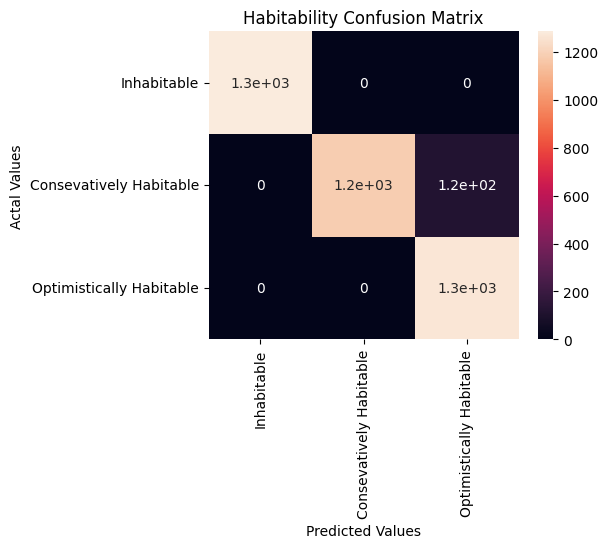

Gradient Boosting classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      0.91      0.95      1301
           2       0.91      1.00      0.96      1267

    accuracy                           0.97      3852
   macro avg       0.97      0.97      0.97      3852
weighted avg       0.97      0.97      0.97      3852



In [38]:
#Gradient Boosting - Classification

from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
gb_model = GradientBoostingClassifier(loss = 'deviance', n_estimators = 10,
                                criterion = 'friedman_mse', max_depth = 6,
                                random_state = 0, max_features = 'auto',
                                max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
gb_predictions = gb_model.predict(X_test)

#Calculate the time taken for further comparison
gb_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
gb_accuracy = accuracy_score(y_test, gb_predictions)

#Plot the Confusion Matrix by calling the function 
confusion_mat = plot_confusion_mat(y_test, gb_predictions)

#Classification Report
print(f"Gradient Boosting classification Report:\n")
print(classification_report(y_test, gb_predictions))

del confusion_mat

In [39]:
#Plot Classification log function
def plot_model_log(log):

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax1.set_title('Accuracy and Time taken', fontsize = 13)
    color = 'tab:green'
    ax1.set_xlabel('Classifier', fontsize = 13)
    ax1.set_ylabel('Time taken', fontsize = 13, color = color)
    ax2 = sns.barplot(x = 'Classifier', y = 'Time taken', data = log, palette = 'summer')
    ax1.tick_params(axis = 'y')
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', fontsize = 13, color = color)
    ax2 = sns.lineplot(x = 'Classifier', y = 'Accuracy', data = log, sort = False, color = color)
    ax2.tick_params(axis = 'y', color = color)

          Classifier  Accuracy  Time taken
0      Decision Tree  0.906802    0.004731
1                KNN  0.983385    0.358510
2  Gradient Boosting  0.969107    0.559831


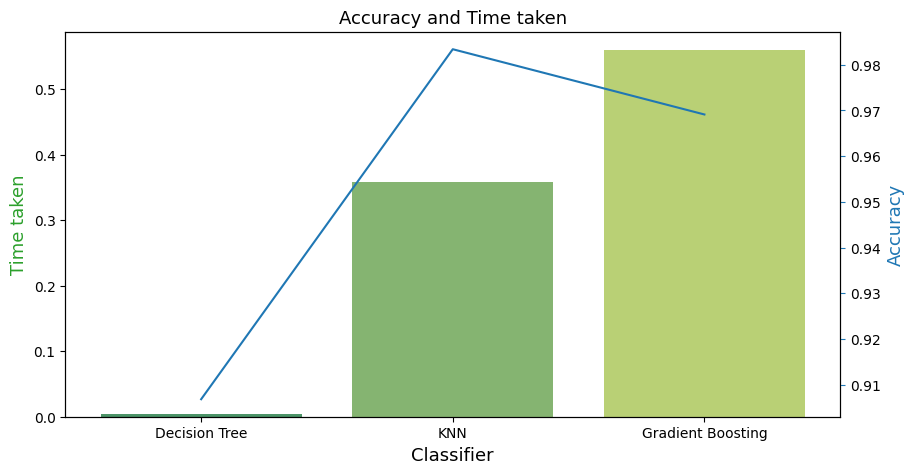

In [40]:
### MODEL COMPARISON
#Create a log of all classifiers : Accuracy and Time

#Make a list of accuracies
accuracy_list = [dtree_accuracy, knn_accuracy, gb_accuracy]

#Make a list of times
time_list = [dtree_time, knn_time, gb_time]

log_data = {'Classifier': ['Decision Tree','KNN','Gradient Boosting'],
              'Accuracy': accuracy_list,
              'Time taken': time_list}
clf_log = pd.DataFrame(log_data)
    
#Plot the log
plot_model_log(clf_log)
print(clf_log)

DISCUSSION AND CONCLUSIONS
Investigating the outputs, the results are nine-folded:
1. I could successfully utilize supervised machine learning to deduce the classes “Inhabitable”, “Conservatively Habitable”, and “Optimistically Habitable” from the data set with high accuracy. 

2. Astronomical data sets should not be tampered with when it comes to outliers.

3. Gradient Boosting was the most impressive classifier for this particular study and data set. This is realized looking at the accuracy of 100% that GB resulted.

4. The next most accurate classifier seemed to be KNN with accuracy of 99%. 

5. The longest time taken belonged to GB. I don’t believe in case of this particular data set, real-time classification is really necessary; suffice to say that this kind of data sets, do not grow that frequently with regard to the size. Thus, it is safe to say GB is the most proper classifier in this study on this data set, even though the time taken is longer than the other two. 
5. Should the time taken be of significance in such studies, we could always go back to KNN which has a good enough accuracy. 

6. Interestingly, the results from modeling with RapidMiner Studio and by coding were different for the same models. I believe different methods used in different parts, in sampling and imputing to name a few, were significant in modeling a classifier and its performance. That may be why the results are different. 

8. To my understanding, the machine learning approach needs the engineer to be involved fully, and using a tool to form a model, is neither a wise choice, nor a faster one. The flexibility in coding, regardless of the programming language, is what makes an engineer capable of understanding how the machine thinks and how he/she should find a way to get the most of it.

9. This was a study done on a great astronomical data set, nevertheless, I suppose there is much more to be done to form a better model for such predictions, which might cost us if not done properly. 